# SALES ANALYSIS

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import os

### Let's merge all the 12 months data into one file

In [2]:

all_sales_data = pd.DataFrame()

files = [file for file in os.listdir('./Sales_Data')]
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_sales_data = pd.concat([all_sales_data, df])

all_sales_data.to_csv("new_all_data.csv", index=False)

### Import csv back to notebook

In [3]:
all_sales_data = pd.read_csv('new_all_data.csv')
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
## lets drop nan rows created

all_sales_data = all_sales_data.dropna(axis=0).reset_index()
all_sales_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Lets clean up the data

In [5]:
## lets drop index column
all_sales_data.drop('index', axis=1, inplace=True)

In [6]:
## first lets check data types 

all_sales_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
## lets find headers that resulted from joining different dataframe

head_df = all_sales_data[all_sales_data['Order ID'] == 'Order ID']

head_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
## lets replace our all data removing these

all_sales_data = all_sales_data[all_sales_data['Order ID'] != 'Order ID']

In [9]:
## lets convert datatypes

all_sales_data['Quantity Ordered'] = all_sales_data['Quantity Ordered'].astype('int64')
all_sales_data['Price Each'] = all_sales_data['Price Each'].astype('float')
all_sales_data['Order Date'] = pd.to_datetime(all_sales_data['Order Date'])

all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [10]:
## lets check

all_sales_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [11]:
## lets extract month into a new column

all_sales_data['Months'] = all_sales_data['Order Date'].dt.month

all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [12]:
## lets add a sales column

all_sales_data['Sales'] = all_sales_data['Quantity Ordered'] * all_sales_data ['Price Each']

all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


### Best sales Month, Sales total that Month

In [13]:
sales_by_months = all_sales_data.groupby('Months').sum().reset_index()

print(sales_by_months)

    Months  Quantity Ordered  Price Each       Sales
0        1             10903  1811768.38  1822256.73
1        2             13449  2188884.72  2202022.42
2        3             17005  2791207.83  2807100.38
3        4             20558  3367671.02  3390670.24
4        5             18667  3135125.13  3152606.75
5        6             15253  2562025.61  2577802.26
6        7             16072  2632539.56  2647775.76
7        8             13448  2230345.42  2244467.88
8        9             13109  2084992.09  2097560.13
9       10             22703  3715554.83  3736726.88
10      11             19798  3180600.68  3199603.20
11      12             28114  4588415.41  4613443.34


In [14]:
## month with higest sales, quantity ordered

sales_by_months.max()

Months                   12.00
Quantity Ordered      28114.00
Price Each          4588415.41
Sales               4613443.34
dtype: float64

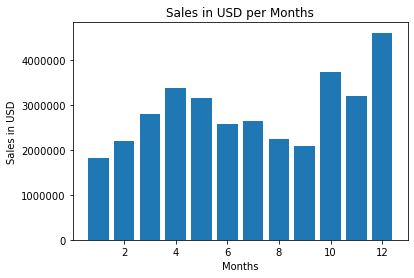

In [15]:
## lets plot the sales data

import matplotlib.pyplot as plt
%matplotlib inline


plt.bar(sales_by_months['Months'], sales_by_months['Sales'])
plt.ylabel('Sales in USD')
plt.xlabel('Months')
plt.title("Sales in USD per Months")
plt.ticklabel_format(useOffset = False, style='plain')
plt.show()



### Lets find the city with highest volume of sales

In [16]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [17]:
## lets extract city from address

all_sales_data['City'] = all_sales_data['Purchase Address'].apply(lambda x: f" {x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})")

all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [18]:
## lets group by city now

sales_by_city = all_sales_data.groupby('City').sum().reset_index()

sales_by_city

,City,Quantity Ordered,Price Each,Months,Sales
0,Atlanta (GA),16602,2779908.20,104794,2795498.58
1,Austin (TX),11153,1809873.61,69829,1819581.75
2,Boston (MA),22528,3637409.77,141112,3661642.01
3,Dallas (TX),16730,2752627.82,104620,2767975.40
4,Los Angeles (CA),33289,5421435.23,208325,5452570.80
5,New York City (NY),27932,4635370.83,175741,4664317.43
6,Portland (ME),2750,447189.25,17144,449758.27
7,Portland (OR),11303,1860558.22,70621,1870732.34
8,San Francisco (CA),50239,8211461.74,315520,8262203.91
9,Seattle (WA),16553,2733296.01,104941,2747755.48


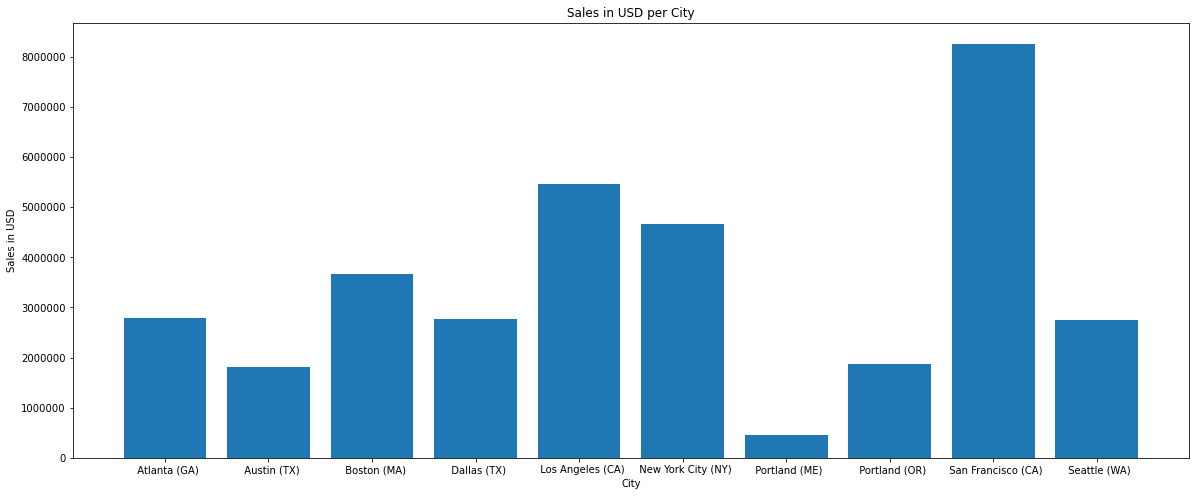

In [19]:
## lets visualize this

plt.figure(figsize= (20, 8))
plt.ticklabel_format(useOffset = False, style='plain')
plt.bar(sales_by_city['City'].unique(), sales_by_city['Sales'])
plt.ylabel('Sales in USD')
plt.xlabel('City')
plt.title("Sales in USD per City")
plt.show()

### lets get the sales by hour and minutes 

In [20]:
## lets extract hour and minutes

all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [21]:
all_sales_data['Hour'] = all_sales_data['Order Date'].dt.hour
all_sales_data['Minute'] = all_sales_data['Order Date'].dt.minute

all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


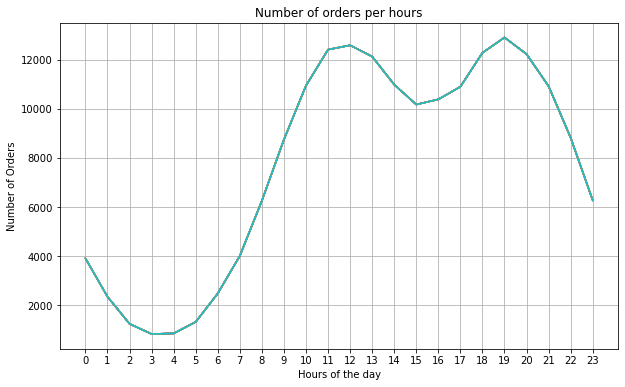

In [22]:
## lets plot the count of orders per hour

hours = all_sales_data.groupby('Hour').sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(hours['Hour'], all_sales_data.groupby('Hour').count())
plt.xticks(hours['Hour'])
plt.ylabel("Number of Orders")
plt.xlabel('Hours of the day')
plt.title("Number of orders per hours")
plt.grid()
plt.show()


#### - from the chart above we see the peak order hours is between 11am to 12 noon and 7pm

####   -   We can schedule advertisement caampaigns just around these times

### Lets find products that sells together

In [23]:
dup_sales = all_sales_data[all_sales_data['Order ID'].duplicated(keep=False)]

dup_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Hour,Minute
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31


In [24]:
## lets merge together the products bought together

dup_sales['Product Pairs'] = dup_sales.groupby('Order ID')['Product'].transform(lambda x: ' ,'.join(x))

dup_sales.head()

C:\Users\RAC\AppData\Local\Temp/ipykernel_17932/1591031786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_sales['Product Pairs'] = dup_sales.groupby('Order ID')['Product'].transform(lambda x: ' ,'.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Hour,Minute,Product Pairs
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone ,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone ,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone ,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone ,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones ,Bose SoundSport He..."


In [25]:
## now lets drop the duplicate orders 

dup_sales = dup_sales[['Order ID', 'Product Pairs']].drop_duplicates()

dup_sales.head()

,Order ID,Product Pairs
2,176560,"Google Phone ,Wired Headphones"
17,176574,"Google Phone ,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones ,Bose SoundSport He..."
31,176586,"AAA Batteries (4-pack) ,Google Phone"
118,176672,"Lightning Charging Cable ,USB-C Charging Cable"


In [26]:
## lets count the number of the pairs

from itertools import combinations
from collections import Counter

count = Counter()

for row in dup_sales['Product Pairs']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)


## this is useful if you want to upsell items. you offer some promotional deals on products

('iPhone ', 'Lightning Charging Cable') 886
('Google Phone ', 'USB-C Charging Cable') 859
('iPhone ', 'Wired Headphones') 443
('Google Phone ', 'Wired Headphones') 405
('iPhone ', 'Apple Airpods Headphones') 329
('Vareebadd Phone ', 'USB-C Charging Cable') 312
('Google Phone ', 'Bose SoundSport Headphones') 192
('USB-C Charging Cable ', 'Wired Headphones') 154
('Vareebadd Phone ', 'Wired Headphones') 140
('Google Phone ', 'USB-C Charging Cable ') 128


### Highest Selling Product

In [27]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [33]:
grp_product = all_sales_data.groupby('Product').sum().reset_index()
grp_product

,Product,Quantity Ordered,Price Each,Months,Sales,Hour,Minute
0,20in Monitor,4129,451068.99,29336,454148.71,58764,122252
1,27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
2,27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
3,34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
4,AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
5,AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
6,Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
7,Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
8,Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789
9,Google Phone,5532,3315000.00,38305,3319200.00,79479,162773


In [29]:
quantity_ordered = all_sales_data.groupby('Product').sum().reset_index()['Quantity Ordered']

quantity_ordered.head()

0     4129
1     6244
2     7550
3     6199
4    27635
Name: Quantity Ordered, dtype: int64

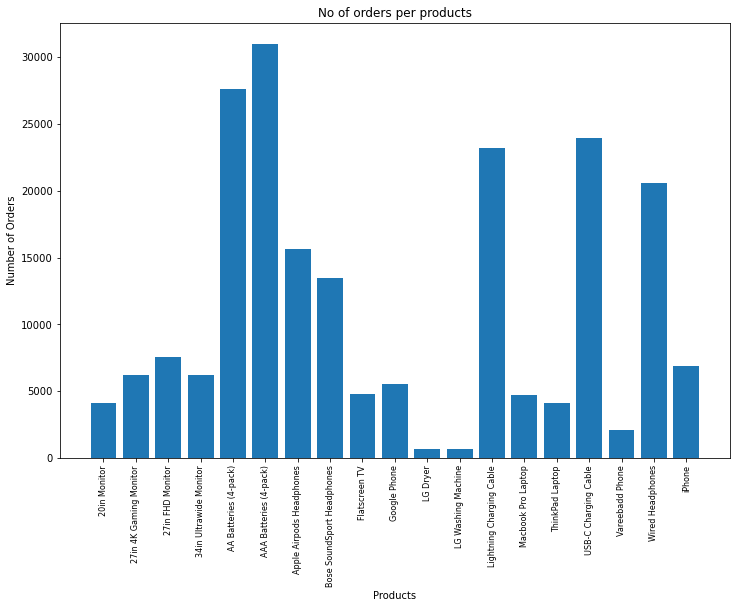

In [30]:
## lets plot bar plot

plt.figure(figsize=(12, 8))
plt.bar(grp_product['Product'], quantity_ordered)
plt.xticks(grp_product['Product'], rotation = 'vertical', size= 8)
plt.ylabel("Number of Orders")
plt.xlabel('Products')
plt.title("No of orders per products")
plt.show()

#### We want to try and understand why AAA Batteries is the most sold item

##### - lets check out their prices first

In [31]:
prd_prices = all_sales_data.groupby('Product').mean()['Price Each']
prd_prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\RAC\AppData\Local\Temp/ipykernel_17932/1387867570.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(grp_product['Product'], rotation= 'vertical', size= 8)


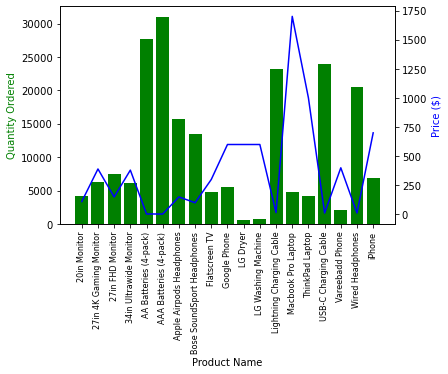

In [32]:
## lets plot the price on the quantity ordered barplot



fig, ax1 = plt.subplots() 
ax2 = ax1.twinx()

ax1.bar(grp_product['Product'], quantity_ordered, color= 'g')
ax2.plot(grp_product['Product'], prd_prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color= 'g')
ax1.set_xticklabels(grp_product['Product'], rotation= 'vertical', size= 8)

ax2.set_ylabel('Price ($)', color= 'b')

plt.show()

#### Product that generates the highest sales

In [34]:
### let plot grouped product against sales

grp_product

,Product,Quantity Ordered,Price Each,Months,Sales,Hour,Minute
0,20in Monitor,4129,451068.99,29336,454148.71,58764,122252
1,27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
2,27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
3,34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
4,AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
5,AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
6,Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
7,Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
8,Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789
9,Google Phone,5532,3315000.00,38305,3319200.00,79479,162773


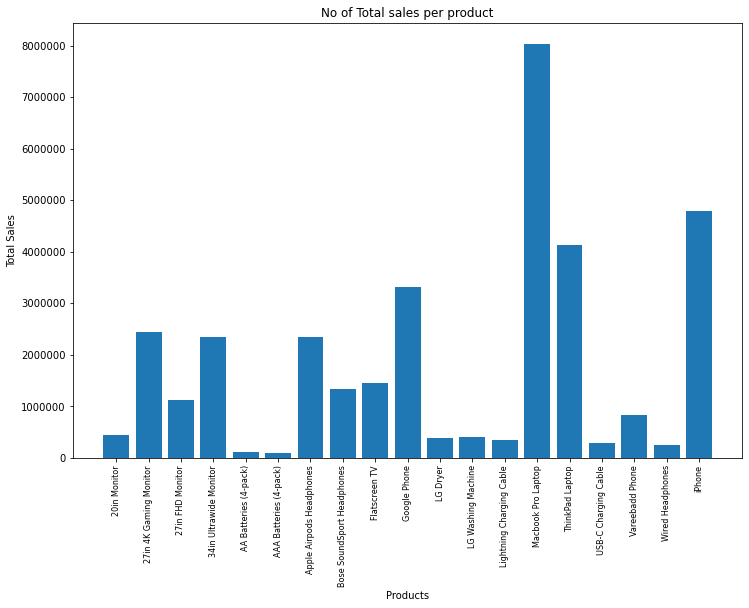

In [36]:
plt.figure(figsize=(12, 8))
plt.ticklabel_format(useOffset = False, style='plain')
plt.bar(grp_product['Product'], grp_product['Sales'])
plt.xticks(grp_product['Product'], rotation = 'vertical', size= 8)
plt.ylabel("Total Sales")
plt.xlabel('Products')
plt.title("No of Total sales per product")
plt.show()

### Conclusions from the Analysis

#### - Month with the best sales is December with Total Quantity Ordered 28114.00 and total Sales $4613443.34

#### - The city with highest sales volume is San Francisco (CA)	with total quantity ordered 50239 and total sales of $8262203.91

#### - The peak order hours is between 11am to 12 noon and 7pm daily

####   -  Implication:  We can schedule advertisement caampaigns just around these times

#### - Product pairs that has the highest sales is iPhone and Lightning Charging Cable with sales of 886

#### - Implication: we can upsell lightning charging cables to anyone buying iPhone. same goes for all other pairs

#### - The highest selling product is AAA Batteries (4-pack) with total quantity sold of 31017

#### - We can attribute this reason to it's price as it has the lowest price of $2.99

#### - Macbook Pro Laptop generated the highest total sales of $8037600.00